<img src="files/mira_logo.png">

# Head Check Analysis in Python - Concept and Validation
*Eric G. Suchanek, Ph.D. v.1, 3/9/19*

## Purpose
The purpose of this effort is to create a program to facilitate the .fits header _Headcheck_ analysis utilized by Drs. Shane and Babcock in their photometry research. In order to provide value the program must parse the .fits file and correctly calculate times, (Local, Universal and Sidereal) for the beginning, middle and endpoint of the exposure. This enables calculation of the Airmass of the object at the time of observation, and provides an excellent 'gutcheck' for data entered by the analyst. The code should also facilitate the analysis of user-input parameters in an effort to understand time differences between the Observatory's clocks.

The compact nature of the program (< 70 lines of code for all the calculations), is a testament to the expressive nature of Python and the extensive capabilities of the astropy, fits and pyplot Python libraries. I would encourage interested parties to peruse the astropy documentation. I've included some useful links at the end of this document.

## Data Used
I used data obtained from the Ubuntu machine _eureka_, from a USB stick installed in the back. The directory was _PHOT030727/C/L*.fits_. The data represent images collected on 2003-7-28, and consists of 9 light frames in .fits format.

## Methodology
Conceptually, the Python code block (program) follows the major procedural steps outlined by Dr Shane in the excellent document _Headcheck Notes and Directions, 12 February 2019_ _after_ user data input. In other words, this code performs the steps usually done with the IRAF programs viz:
* Extract data from the header
* Calculate the sidereal time for the midpoint of the exposure
* Calculate the Airmass

Additionally the program:
* Calculates times based on the JD of the exposure, midpoint and end of the exposure: (UTC, Local and Sidereal)

First we read .fits files from the Axiom camera at Chews Ridge and extracts a number of header fields as per the Headcheck procedure:
* obs-date
* time start
* exposure time 
* object
* RA
* DEC
* airmass

The fields necessary for the relevant calculations are:
* Observation date (UTC)
* Exposure duration (second)
* Object Right Ascension
* Object Declination

Some additional header fields are retrieved as part of code validation and to provide a general snapshot of each frame.
* Darktime
* CCD-TEMP
* Gain
* Rnoise

The program then computes a number of time and object-related parameters:
* Exposure time start
* Exposure time middle
* Exposure time end

These are calculated in UTC, LZT and LST. 

The actual observatory location is not included in the .fits file. This is required in order to compute the object's altitude at a given time and date. I used the Google Earth location for OOS: _-121deg 34min 0s, 36deg 18min 20sec, 1525m altitude_. This is easily adjusted for higher accuracy.

The time calculations are straightforward, (one simply uses + and -), with the astropy library since the time mathematics is managed by the _Time_ and _SkyCoord_ classes; these  are capable of correctly manipulating coordinate frames and time in an astronomical context.

Finally, the Altitude of the object is computed for the mid exposure time. This is then used to compute the Airmass of the object.

Interestingly, the initial version failed to account for daylight savings time. This was evident in the large disparity between the reported Airmass and computed Airmass. As a result, I added a routine that utilizes the _pytz_ library to correctly determine the Daylight Saving Time status for a given date. This library includes the daylight saving time transition dates for all timezones for several hundred years. This will prove to be generally useful for our future time-based needs, assuming the observations aren't more than a few hundred years from now.

The results indicate that the UTC/Local time conversions are correct based on the timezone and Daylight Saving Time. The high agreement between the computed and calculated airmass indicates that the Alt/Az converstion from Right Ascension, Declination and Local Sidereal time are also correct. In addition, I computed positions for a known object (M57) in this program and Stellarium for the actual observation date in this data set. The results were in high agreement (<1% error, not shown).

These numerical results are then displayed in tabular form. The raw image and a stretched
version are also shown side by side. The stretched version is normalized over the image intensities and displayed. I did this mainly to just look at the images. Their display is secondary to the code's primary purpose.

## Simulation
I simulated the night sky for frame L110_5.fits using Stellarium. The date, time and location were set according to the parameters extracted from the header, and entered into the program. I did this in an effort to check the Hour Angle, Altitude and Sidereal calculations for accuracy (within the accuracy of Stellarium simulation of course). I found a star quite close to the input RA and Dec, selected it and observed the coordinates. A snapshot of the simulation is shown below (the June Scutid label references a meteor shower and may be ignored):

<img src=files/stellarium_conf.png height="600" width="600">


## Conclusions
* The astropy libraries make time, date and sidereal time calculations straightforward. Time handling in general is fraught with complexities, particularly when one is working across multiple decades which can include leap years and non-uniform Dailylight Saving Time change dates. The libraries take care of all the myriad details and edge cases that typically make even simple calculations difficult. 
* The code correctly reads and parses the header for a given light frame acquired at OOS. The calculations and simulation results confirm that the internal astropy routines are capable of correctly manipulating the data in time and normal astronomical coordinate frames. This confirms that the method can produce meaningful results. This is encouraging since the library routines are heavily used within the Python astronomical community!
* The rapidity of the calculations suggests that overall Headcheck throughput can be greatly enhanced _via_ this method.

## Next steps
Add code to take input per the Headcheck manual and yield a table consistent with the current Headcheck protocol.

## References
* Astropy documentation: https://astropy.readthedocs.io/en/latest/.
* Using SkyCoords: http://docs.astropy.org/en/stable/coordinates/skycoord.html#array-operations


### Final thoughts
I've done my best to write this in a way that is readable to non-Python speakers. There are nuances in the syntax that are not necessarily clear unless one has an understanding of object-oriented programming but I hope the comments will facilitate understanding. The comments begin with a # symbol and are not executed as programming statements.

File:         ./PHOT030727/C/L110_5.fits
Object:       Landolt 110a
Local Time: 2003-07-28 03:05:36.890 PDT
Exposure:   180.0 s
CCD Temp:   -20.2381 deg
*****************************


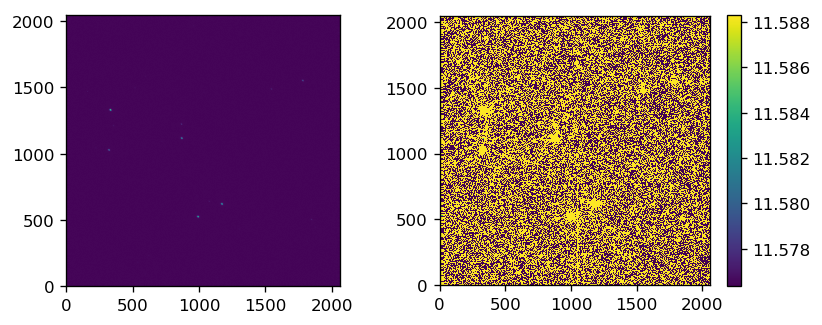

RA:                         18h43m09.574s
Dec:                        -0d29m24.605s
HA start:                   3h38m50.9191s
HA mid:                     3h40m21.1655s
Altitude (mid exp):         +27d10m40.1405s
Exposure:                   180.0 s
Airmass (hdr):              2.14
Airmass mid,(computed):     2.189
JD UTC start exp, (hdr):    2452848.9205658566
JD UTC mid exp:             2452848.921607523
JD UTC end exp:             2452848.92264919
UTC start exp:              2003-07-28 10:05:36.890
UTC mid exp:                2003-07-28 10:07:06.890
UTC end exp:                2003-07-28 10:08:36.890
LZT start exp:              2003-07-28 03:05:36.890
LZT mid exp:                2003-07-28 03:07:06.890
LZT end exp:                2003-07-28 03:08:36.890
LST start:                  15h20m51.4976s
LST mid:                    15h22m21.744s
LST end:                    15h23m51.9904s
UST start:                  22h22m00.4931s
UST mid:                    22h23m30.7395s
UST end:             

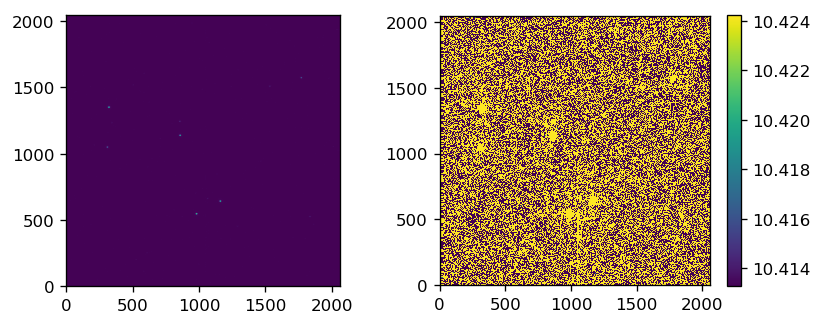

RA:                         18h43m09.413s
Dec:                        -0d29m20.227s
HA start:                   2h12m07.9532s
HA mid:                     2h13m38.1997s
Altitude (mid exp):         +41d55m03.4598s
Exposure:                   180.0 s
Airmass (hdr):              1.472
Airmass mid,(computed):     1.497
JD UTC start exp, (hdr):    2452848.8605089122
JD UTC mid exp:             2452848.861550579
JD UTC end exp:             2452848.8625922455
UTC start exp:              2003-07-28 08:39:07.970
UTC mid exp:                2003-07-28 08:40:37.970
UTC end exp:                2003-07-28 08:42:07.970
LZT start exp:              2003-07-28 01:39:07.970
LZT mid exp:                2003-07-28 01:40:37.970
LZT end exp:                2003-07-28 01:42:07.970
LST start:                  13h54m08.3708s
LST mid:                    13h55m38.6172s
LST end:                    13h57m08.8636s
UST start:                  20h55m17.3662s
UST mid:                    20h56m47.6127s
UST end:         

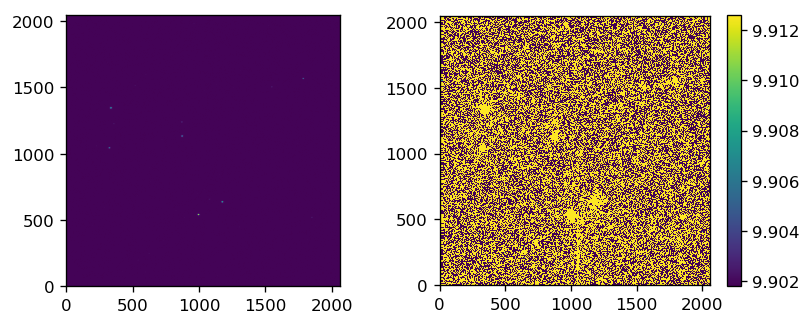

RA:                         18h43m09.608s
Dec:                        -0d29m21.409s
HA start:                   2h06m13.6213s
HA mid:                     2h07m43.8677s
Altitude (mid exp):         +42d47m06.5869s
Exposure:                   180.0 s
Airmass (hdr):              1.447
Airmass mid,(computed):     1.472
JD UTC start exp, (hdr):    2452848.8564212965
JD UTC mid exp:             2452848.857462963
JD UTC end exp:             2452848.8585046297
UTC start exp:              2003-07-28 08:33:14.800
UTC mid exp:                2003-07-28 08:34:44.800
UTC end exp:                2003-07-28 08:36:14.800
LZT start exp:              2003-07-28 01:33:14.800
LZT mid exp:                2003-07-28 01:34:44.800
LZT end exp:                2003-07-28 01:36:14.800
LST start:                  13h48m14.2338s
LST mid:                    13h49m44.4802s
LST end:                    13h51m14.7266s
UST start:                  20h49m23.2293s
UST mid:                    20h50m53.4757s
UST end:         

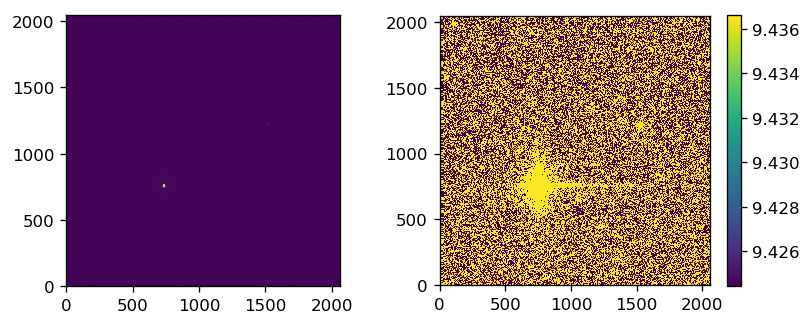

RA:                         15h38m57.013s
Dec:                        -0d17m46.971s
HA start:                   1h01m00.6136s
HA mid:                     1h01m45.7368s
Altitude (mid exp):         +50d41m40.6898s
Exposure:                   90.0 s
Airmass (hdr):              1.293
Airmass mid,(computed):     1.292
JD UTC start exp, (hdr):    2452848.68368125
JD UTC mid exp:             2452848.6842020834
JD UTC end exp:             2452848.6847229167
UTC start exp:              2003-07-28 04:24:30.060
UTC mid exp:                2003-07-28 04:25:15.060
UTC end exp:                2003-07-28 04:26:00.060
LZT start exp:              2003-07-27 21:24:30.060
LZT mid exp:                2003-07-27 21:25:15.060
LZT end exp:                2003-07-27 21:26:00.060
LST start:                  9h38m48.6311s
LST mid:                    9h39m33.7543s
LST end:                    9h40m18.8775s
UST start:                  16h39m57.6266s
UST mid:                    16h40m42.7498s
UST end:              

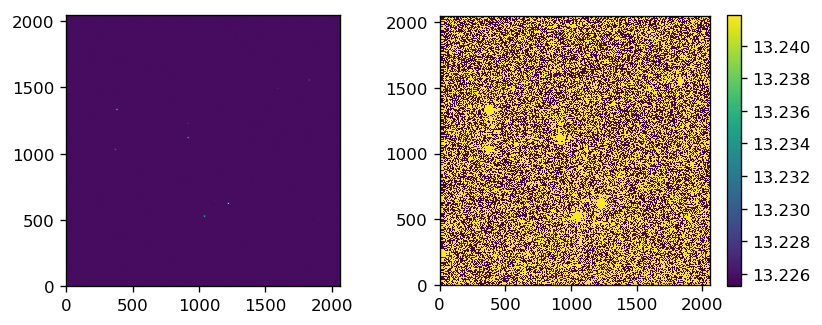

RA:                         18h43m10.224s
Dec:                        -0d29m23.82s
HA start:                   -0h24m47.1429s
HA mid:                     -0h23m16.8965s
Altitude (mid exp):         +52d48m18.9081s
Exposure:                   180.0 s
Airmass (hdr):              1.239
Airmass mid,(computed):     1.255
JD UTC start exp, (hdr):    2452848.7518447917
JD UTC mid exp:             2452848.7528864583
JD UTC end exp:             2452848.753928125
UTC start exp:              2003-07-28 06:02:39.390
UTC mid exp:                2003-07-28 06:04:09.390
UTC end exp:                2003-07-28 06:05:39.390
LZT start exp:              2003-07-27 23:02:39.390
LZT mid exp:                2003-07-27 23:04:09.390
LZT end exp:                2003-07-27 23:05:39.390
LST start:                  11h17m14.0856s
LST mid:                    11h18m44.332s
LST end:                    11h20m14.5784s
UST start:                  18h18m23.0811s
UST mid:                    18h19m53.3275s
UST end:         

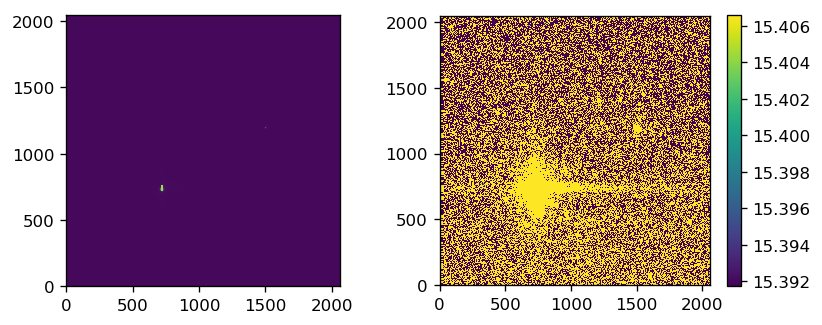

RA:                         15h38m56.797s
Dec:                        -0d17m42.259s
HA start:                   1h38m52.9234s
HA mid:                     1h40m23.1698s
Altitude (mid exp):         +46d37m40.4933s
Exposure:                   180.0 s
Airmass (hdr):              1.373
Airmass mid,(computed):     1.376
JD UTC start exp, (hdr):    2452848.7099068286
JD UTC mid exp:             2452848.710948495
JD UTC end exp:             2452848.7119901623
UTC start exp:              2003-07-28 05:02:15.950
UTC mid exp:                2003-07-28 05:03:45.950
UTC end exp:                2003-07-28 05:05:15.950
LZT start exp:              2003-07-27 22:02:15.950
LZT mid exp:                2003-07-27 22:03:45.950
LZT end exp:                2003-07-27 22:05:15.950
LST start:                  10h16m40.7249s
LST mid:                    10h18m10.9713s
LST end:                    10h19m41.2178s
UST start:                  17h17m49.7204s
UST mid:                    17h19m19.9668s
UST end:         

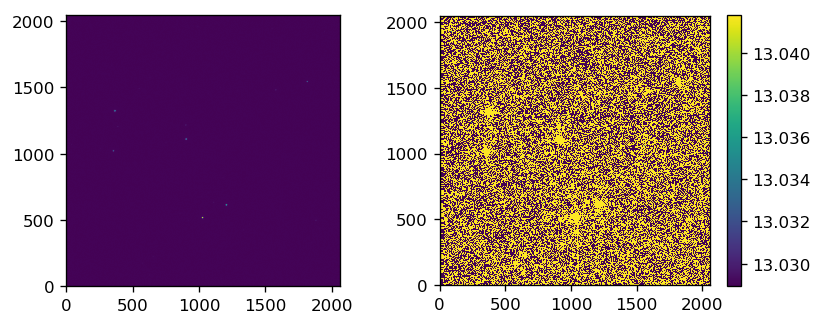

RA:                         18h43m10.018s
Dec:                        -0d29m26.086s
HA start:                   -0h31m25.084s
HA mid:                     -0h29m54.8376s
Altitude (mid exp):         +52d32m51.0257s
Exposure:                   180.0 s
Airmass (hdr):              1.243
Airmass mid,(computed):     1.26
JD UTC start exp, (hdr):    2452848.7472491898
JD UTC mid exp:             2452848.7482908564
JD UTC end exp:             2452848.749332523
UTC start exp:              2003-07-28 05:56:02.330
UTC mid exp:                2003-07-28 05:57:32.330
UTC end exp:                2003-07-28 05:59:02.330
LZT start exp:              2003-07-27 22:56:02.330
LZT mid exp:                2003-07-27 22:57:32.330
LZT end exp:                2003-07-27 22:59:02.330
LST start:                  11h10m35.9385s
LST mid:                    11h12m06.1849s
LST end:                    11h13m36.4313s
UST start:                  18h11m44.934s
UST mid:                    18h13m15.1804s
UST end:          

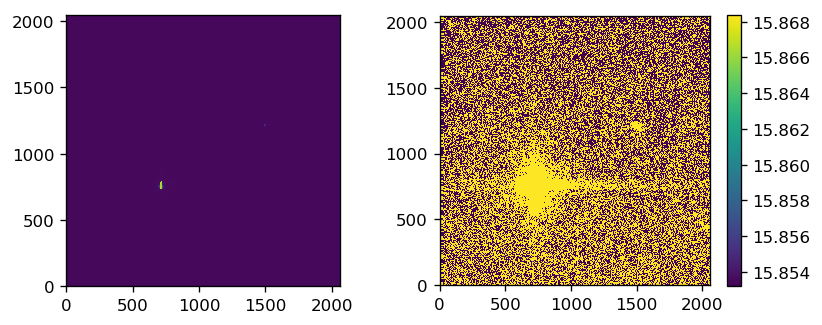

RA:                         15h38m56.711s
Dec:                        -0d17m46.211s
HA start:                   2h06m52.9865s
HA mid:                     2h08m23.2329s
Altitude (mid exp):         +42d50m01.5656s
Exposure:                   180.0 s
Airmass (hdr):              1.471
Airmass mid,(computed):     1.471
JD UTC start exp, (hdr):    2452848.729297917
JD UTC mid exp:             2452848.7303395835
JD UTC end exp:             2452848.73138125
UTC start exp:              2003-07-28 05:30:11.340
UTC mid exp:                2003-07-28 05:31:41.340
UTC end exp:                2003-07-28 05:33:11.340
LZT start exp:              2003-07-27 22:30:11.340
LZT mid exp:                2003-07-27 22:31:41.340
LZT end exp:                2003-07-27 22:33:11.340
LST start:                  10h44m40.702s
LST mid:                    10h46m10.9484s
LST end:                    10h47m41.1948s
UST start:                  17h45m49.6975s
UST mid:                    17h47m19.9439s
UST end:            

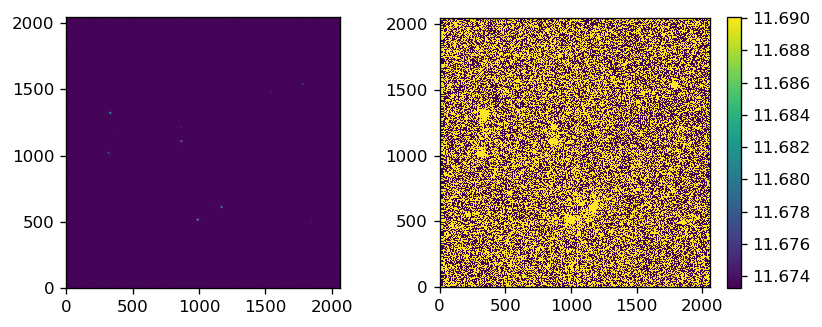

RA:                         18h43m09.532s
Dec:                        -0d29m26.231s
HA start:                   3h44m12.7096s
HA mid:                     3h45m42.956s
Altitude (mid exp):         +26d10m42.68s
Exposure:                   180.0 s
Airmass (hdr):              2.203
Airmass mid,(computed):     2.267
JD UTC start exp, (hdr):    2452848.9242796297
JD UTC mid exp:             2452848.9253212963
JD UTC end exp:             2452848.926362963
UTC start exp:              2003-07-28 10:10:57.760
UTC mid exp:                2003-07-28 10:12:27.760
UTC end exp:                2003-07-28 10:13:57.760
LZT start exp:              2003-07-28 03:10:57.760
LZT mid exp:                2003-07-28 03:12:27.760
LZT end exp:                2003-07-28 03:13:57.760
LST start:                  15h26m13.2461s
LST mid:                    15h27m43.4925s
LST end:                    15h29m13.7389s
UST start:                  22h27m22.2416s
UST mid:                    22h28m52.488s
UST end:             

In [3]:
#
# Analyze fit files from the Axiom at Chews Ridge as part of Whitney's 'headcheck' procedure.
# This code reads .fits frames from a specified path,extracts the obs-date, exposure time, 
# airmass, time start, object, RA, DEC.
# The program computes the time mid, time end, HA, Airmass, 
# in UTC and LST by using the coordinates of Chews Ridge, This is used to compute the object's
# HA, altitude and airmass. These results are displayed in tabular form. The raw image and a stretched
# version are shown side by side. The stretched version is normalized over the image intensities
# code automatically adjusts the timezone offset by checking to see if DST is in effect.
# 
# -egs- 3/9/19 

from glob import glob
import os
import time
import datetime

import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, Latitude, Longitude
from astropy.io import fits
from astropy.time import Time

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from astropy.visualization import (SqrtStretch,ImageNormalize,PercentileInterval)

#
# DST calculation for a given date
# expects date to be .unix format

def is_dst(date):
    return bool(time.localtime(date).tm_isdst)

# Set up our Observatory location.
# OOS coordinates taken from Google Earth
sitelong = '-121:34:00'
sitelat = '36:18:20'
height = 1525*u.m

# convert to geodetic coords via the EarthLocation class. We need this for sidereal calculations
observatory_location = EarthLocation(sitelong, sitelat, height=height)

# Base constant UTC offset for US/Pacific. This can change to -7 hour when DST is in effect.
# the local var utcoffset reflects the ACTUAL utcoffset for the given date, taking DST into account
UTC_offset = -8*u.hour

# process only the light frames. this command produces a list of files matching the string L*.fits
# for a specific path
path = './PHOT030727/C/'
files = glob(path + 'L*.fits')

# get the start time and set the file counter (count) to 0
start_time = time.time()
count = 0
# toggle image plotting
Plot_images = True

ccd_temperatures = [] # list to hold temperatures.

# Loop over all files
for fits_file in files:
    # open the file and get the data block (image) and the header
    # the header is in block 0 of the fits file
    data, hdr = fits.getdata(fits_file, header=True, ext=0)
    
    # Collect parameters from the hdr
    # these statements perform the same operations as those indicated in Appendix C
    # of the headcheck protocol. Additional fields are collected for testing purposes
    
    date_obs = hdr['date-obs']
    exptime = hdr['exptime']
    obj_name = hdr['object']
    airmass = hdr['airmass']
    obj_ra = hdr['ra']
    obj_dec = hdr['dec']
    
    # extra fields extracted for testing
    obj_detector = hdr['detector']
    obj_filter = hdr['filter']
    obj_darktime = hdr['darktime']
    obj_ccd_temp = hdr['ccd-temp']
    ccd_gain = hdr['gain']
    ccd_rnoise = hdr['rnoise']
    
    # we have to convert the scalar exptime to an actual quantity using the units library
    # so the time math works correctly. Since exposure is in seconds we use... seconds
    exposure_time = exptime*u.second 
    ccd_temp = obj_ccd_temp*u.deg # ok technically this is angular, but I use it for display only
    
    # save the temperature to plot it in the next block. This is an extra step but I wanted to
    # plot the CCD temperatures
    ccd_temperatures.append(obj_ccd_temp) 
    
    
    # convert the .fits strings for ra and dec into actual angle objects for later use
    # the units library makes this possible, and enforces correct unit usage
    ra = Longitude(obj_ra, unit=u.hourangle)
    dec = Latitude(obj_dec, unit=u.deg)

    # reformat the ra and dec into nice strings for printing. Cosmetic
    ra_hms_str = ra.to_string(u.hour, precision=4)
    dec_dms_str = dec.to_string(u.degree, precision=4)
    radec_string = ra_hms_str + ' ' + dec_dms_str
    
    # Do the time calculations based on input file date-obs from the hdr
    # We can use simple addition and subtraction here since our units are now
    # established. First create a Time object using the input date/time string and our
    # Observatory location. Then, compute the mid and end times in UTC.
    UTC_time_observation = Time(date_obs,format='fits',location=observatory_location)
    UTC_mid_exposure_time = UTC_time_observation + exposure_time / 2
    UTC_end_exposure_time = UTC_time_observation + exposure_time
    
    # check if dst is in effect and set our utcoffset appropriately. Note use of proper units
    if is_dst(UTC_time_observation.unix):
        utcoffset = UTC_offset + 1*u.hour
        dst_string = 'PDT'
    else:
        dst_string = 'PST'

    # Perform the time calculations on the beginning, mid and end times in LZT 
    # technically this is an extra step since we can easily transform the UTC calculations 
    # performed above, by using the UTC offset alone.
    # Consistent results are expected. (Delta time should be utcoffset only). Extra steps, testing
    
    local_time_observation = Time(UTC_time_observation + utcoffset, location=observatory_location)
    local_time_observation_mid = local_time_observation + exposure_time / 2
    local_time_observation_end = local_time_observation + exposure_time
    
    # Compute sidereal times for the observation
    # This code performs the same operations as those in Appendix D of the headcheck protocol
    # and is therefore required
    # Compute mean Sidereal time for LZT, UTC for start, mid and end exposure times
    
    sidereal_time_type = 'mean' # or 'apparent'. We use mean.
    
    sidereal_time_local_start = local_time_observation.sidereal_time(sidereal_time_type) 
    sidereal_time_local_mid = local_time_observation_mid.sidereal_time(sidereal_time_type) 
    sidereal_time_local_end = local_time_observation_end.sidereal_time(sidereal_time_type) 

    sidereal_time_UTC_start = UTC_time_observation.sidereal_time(sidereal_time_type) 
    sidereal_time_UTC_mid = UTC_mid_exposure_time.sidereal_time(sidereal_time_type) 
    sidereal_time_UTC_end = UTC_end_exposure_time.sidereal_time(sidereal_time_type) 

    # object's AltAz computed from RA,Dec and site location with time as input:  UTC
    # note that the SkyCoord object allows specification of the equinox.
    # 
    
    object_observed_camera_start = SkyCoord(ra,dec,obstime=UTC_time_observation,equinox='J2000',
                                           location=observatory_location)
    
    object_observed_camera_mid = SkyCoord(ra,dec,obstime=UTC_mid_exposure_time,equinox='J2000',
                                         location=observatory_location)

    # the AltAz class represents the Altitude and Azimuth of the SkyCoord object
    # for a given time and geodetic location. This statement creates one for the mid point 
    # of the exposure. The SkyCoord class offers the transform_to procedure which will return
    # on object containing the Altitude and Azimuth of the input coordinates, given the geodetic
    # coordinates, observation date and epoch
    
    object_Sky = SkyCoord(ra,dec,location=observatory_location,equinox='J2000')
    object_altaz_camera_mid = object_Sky.transform_to(AltAz(obstime=(UTC_mid_exposure_time),
                                                            location=observatory_location))
    alt = object_altaz_camera_mid.alt
    alt_str = alt.to_string(u.degree, alwayssign=True)
    # airmass is a property of the AltAz class    
    # this statement is equivalent to the operations indicated in Appendix E of
    # the headcheck documentation
    
    computed_airmass_mid = object_altaz_camera_mid.secz
    
    # calculate the hour angle for start and mid exposure times. The syntax is straightforward
    # since the units are correct. I compute both the start and mid hour angle but in general
    # we only use the mid exposure time.
    hourangle_start = sidereal_time_UTC_start - object_observed_camera_start.ra
    hourangle_mid = sidereal_time_UTC_mid - object_observed_camera_mid.ra
    
    print('File:        ', fits_file)
    print('Object:      ', obj_name)
    print("Local Time: {} {}".format(local_time_observation.iso, dst_string))
    print('Exposure:  ', exposure_time)
    print('CCD Temp:  ', ccd_temp)
    # print('CCD Gain:    ', ccd_gain)
    # print('CCD Rnoise:  ', ccd_rnoise)
    print('*****************************')
    
    # additional code to display the image and a stretched version side by side.
    # the following is needed to stretch the image and then display it. it has nothing to do
    # with astronomical calculations. It does show how straightforward it is to display the
    # image data associated with the .fits file however
    
    if Plot_images:
        norm = ImageNormalize(data, interval=PercentileInterval(.1))
        fig = plt.figure(figsize=(8,3),dpi=120)
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.imshow(data, origin='lower')
        ax2 = fig.add_subplot(1,2,2)
        im2 = ax2.imshow(data, origin='lower',norm=norm)
        fig.colorbar(im2)
        plt.show()
    
    print('RA:                        ', ra)
    print('Dec:                       ', dec)
    print('HA start:                  ', hourangle_start)
    print('HA mid:                    ', hourangle_mid)
    print('Altitude (mid exp):        ', alt_str)
    print('Exposure:                  ', exposure_time)
    print('Airmass (hdr):             ', airmass)
    print('Airmass mid,(computed):     {0:.4}'.format(computed_airmass_mid))
    print('JD UTC start exp, (hdr):   ', UTC_time_observation.jd)
    print('JD UTC mid exp:            ', UTC_mid_exposure_time.jd)
    print('JD UTC end exp:            ', UTC_end_exposure_time.jd)
    print('UTC start exp:             ', UTC_time_observation.iso)
    print('UTC mid exp:               ', UTC_mid_exposure_time.iso)
    print('UTC end exp:               ', UTC_end_exposure_time.iso)
    print('LZT start exp:             ', local_time_observation.iso)
    print('LZT mid exp:               ', local_time_observation_mid.iso)
    print('LZT end exp:               ', local_time_observation_end.iso)
    print('LST start:                 ', sidereal_time_local_start)
    print('LST mid:                   ', sidereal_time_local_mid)
    print('LST end:                   ', sidereal_time_local_end)
    print('UST start:                 ', sidereal_time_UTC_start)
    print('UST mid:                   ', sidereal_time_UTC_mid)
    print('UST end:                   ', sidereal_time_UTC_end)
    print('---------------------------------------------------')
    count += 1 # increment the frame count
    
    # to actually update the fits header with new/additional info we use the following:
    # fits.writeto(fits_image_file, data, hdr, overwrite=True)

end_time = time.time()
elapsed_time = (end_time - start_time)*u.s

print('Processed', count, 'files in:', elapsed_time)
       
########### End of Program ##############

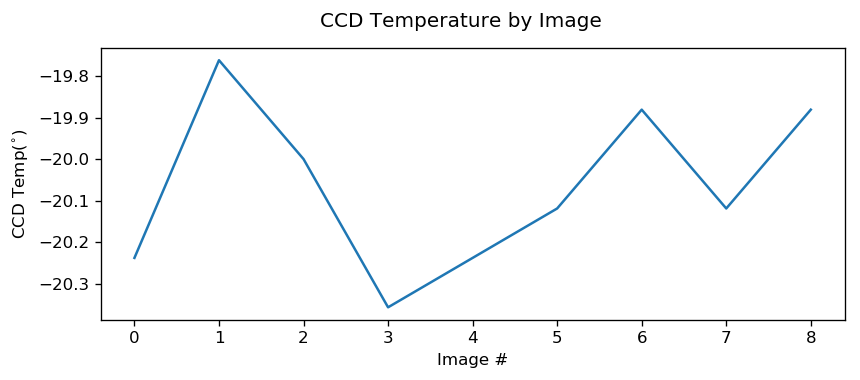

In [4]:
#
# Plot CCD temperature for each image
#
import numpy as np
Plot_temp = True
if Plot_temp:
        fig2 = plt.figure(figsize=(8,3),dpi=120)
        fig2.suptitle('CCD Temperature by Image')
        ax = fig2.add_subplot(1, 1, 1)
        ax.set_xlabel('Image #')
        ax.set_ylabel('CCD Temp($^{\circ}$)')
        ax.plot(ccd_temperatures)
        plt.show()
### end of code ###